In [1]:
#--------------Importing Libraries----------------#
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
#----------------Defining Functions-------------------#
def misclassified_rate(y,y_estimated):
    count=0
    for i in range(len(y)):
        if y_estimated[i]!= y[i]:
            count= count+1
    miscl_rate = count/len(y)*100
    return miscl_rate

def root_mean_square(y_estimated):
    rms = np.sqrt(np.mean((np.array(y_estimated)-0.5)**2))
    return rms

def discard_outliers(name):
    u = np.median(df[name])
    s = np.std(df[name])
    filtered= [e for e in (df[name]) if (u - 2 * s < e < u + 2 * s)]
    return filtered


In [3]:
#-----------------Reading Dataset--------------------#
df = pd.read_csv("OnlineNewsPopularity.csv")
print("Size of Original dataset")
print(df.shape)


#--------------Dataset Preprocessing-----------------#
df.columns = [i.strip() for i in df.columns]  # space removing 

#dropping those articles which time delta is less than 1 month
df_pre_1 = df.drop(df[df.timedelta < 30].index)
print("Size of dataset after removing recent articles")
print(df_pre_1.shape)


#dropping the non-prediction features
df_pre_2 = df_pre_1.drop(['url',df.keys()[1]], axis=1) #Dataset 2 (with outlier, without PCA)
print("Size of dataset after removing non-prediction features")
print(df_pre_2.shape)


#Removing outliers from the dataset
df_pre_3 = df_pre_2[df_pre_2['shares']<26900]   #Dataset 4 (without outlier, without PCA)
print("Size of dataset after removing outliers from shares column")
print(df_pre_3.shape)

#Data normalization of numeric features
scaler = MinMaxScaler()
numerical = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs','num_videos',\
            'average_token_length','num_keywords','self_reference_min_shares','self_reference_max_shares',\
             'self_reference_avg_sharess']
df_pre_3[numerical] = scaler.fit_transform(df_pre_3[numerical])
df_pre_2[numerical] = scaler.fit_transform(df_pre_2[numerical])

Size of Original dataset
(39644, 61)
Size of dataset after removing recent articles
(38457, 61)
Size of dataset after removing non-prediction features
(38457, 59)
Size of dataset after removing outliers from shares column
(37964, 59)


Dataset - 1
---------------------------------------
 
Root Mean squared error for Linear Regression
11179.90889287931
---------------------------------------
 
Root Mean squared error for Logistic Regression
12099.557284596984
---------------------------------------
 
Root Mean squared error for Random Forest
5406.8320801770715
---------------------------------------
[11179.90889287931, 12099.557284596984, 5406.8320801770715]
 


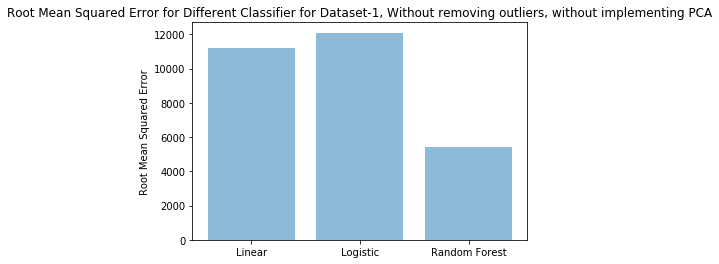

In [6]:
#Dataset Splitting
train, test = train_test_split(df_pre_2, test_size=0.20, random_state=42)
X_train = train.drop(['shares'], axis=1)  
y_train = train['shares']
X_test = test.drop(['shares'], axis=1)  
y_test = test['shares']


rmse_list=[]
print("Dataset - 1")
print("---------------------------------------")
print(" ")

#Applying Linar Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean squared error for Linear Regression")
print(lin_rmse)
rmse_list.append(lin_rmse)
print("---------------------------------------")
print(" ")

#Applying Logistic Regression
logistic_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_train)
log_mse = mean_squared_error(y_train, y_pred)
log_rmse = np.sqrt(log_mse)
print("Root Mean squared error for Logistic Regression")
print(log_rmse)
rmse_list.append(log_rmse)
print("---------------------------------------")
print(" ")

#Applying Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42, max_features = 20, n_jobs = 8)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_train)
rf_mse = mean_squared_error(y_train, y_pred)
rf_rmse = np.sqrt(rf_mse)
print("Root Mean squared error for Random Forest")
print(rf_rmse)
rmse_list.append(rf_rmse)
print("---------------------------------------")
print(rmse_list)
print(" ")

model_list = ['Linear', 'Logistic', 'Random Forest']
y_pos = np.arange(0, 3)
x_rate = rmse_list[0:3]  
plt.bar(y_pos, x_rate, align='center', alpha=0.5)
plt.xticks(y_pos, model_list)
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error for Different Classifier for Dataset-1, Without removing outliers, without implementing PCA') 
plt.show() 


Dataset - 2
---------------------------------------
 
Root Mean squared error for Linear Regression
3199.776278574742
---------------------------------------
 
Root Mean squared error for Logistic Regression
3724.263074160661
---------------------------------------
 
Root Mean squared error for Random Forest
1479.8514037070643
---------------------------------------
[3199.776278574742, 3724.263074160661, 1479.8514037070643]
 


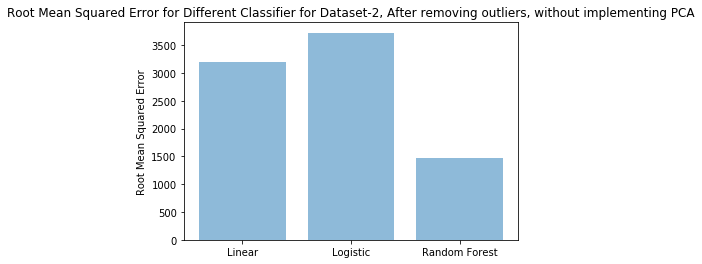

In [7]:
#Dataset Splitting
train, test = train_test_split(df_pre_3, test_size=0.20, random_state=42)
X_train = train.drop(['shares'], axis=1)  
y_train = train['shares']
X_test = test.drop(['shares'], axis=1)  
y_test = test['shares']


rmse_list=[]
print("Dataset - 2")
print("---------------------------------------")
print(" ")

#Applying Linar Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean squared error for Linear Regression")
print(lin_rmse)
rmse_list.append(lin_rmse)
print("---------------------------------------")
print(" ")

#Applying Logistic Regression
logistic_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_train)
log_mse = mean_squared_error(y_train, y_pred)
log_rmse = np.sqrt(log_mse)
print("Root Mean squared error for Logistic Regression")
print(log_rmse)
rmse_list.append(log_rmse)
print("---------------------------------------")
print(" ")

#Applying Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42, max_features = 20, n_jobs = 8)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_train)
rf_mse = mean_squared_error(y_train, y_pred)
rf_rmse = np.sqrt(rf_mse)
print("Root Mean squared error for Random Forest")
print(rf_rmse)
rmse_list.append(rf_rmse)
print("---------------------------------------")
print(rmse_list)
print(" ")

model_list = ['Linear', 'Logistic', 'Random Forest']
y_pos = np.arange(0, 3)
x_rate = rmse_list[0:3]  
plt.bar(y_pos, x_rate, align='center', alpha=0.5)
plt.xticks(y_pos, model_list)
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error for Different Classifier for Dataset-2, After removing outliers, without implementing PCA') 
plt.show() 


Dataset - 3
---------------------------------------
 
Root Mean squared error for Linear Regression
11216.127790842078
---------------------------------------
 
Root Mean squared error for Logistic Regression
11997.646691560438
---------------------------------------
 
Root Mean squared error for Random Forest
5468.3133521678
---------------------------------------
[11216.127790842078, 11997.646691560438, 5468.3133521678]
 


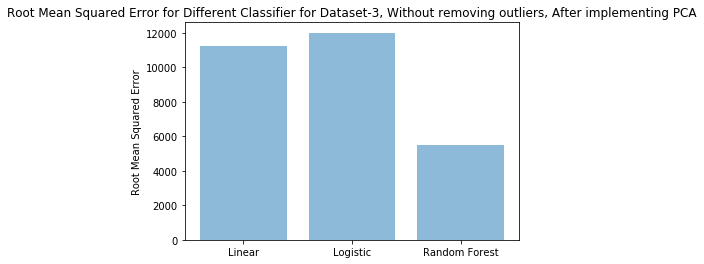

In [10]:
rmse_list=[]
print("Dataset - 3")
print("---------------------------------------")
print(" ")

#Dataset 4 Splitting
train, test = train_test_split(df_pre_2, test_size=0.20, random_state=42)
X_train_raw = train.drop(['shares'], axis=1)  
y_train = train['shares']
X_test_raw = test.drop(['shares'], axis=1)  
y_test = test['shares']

#applying PCA

pca = PCA(n_components=5)
pca.fit(X_train_raw)
X_train_pca = pca.transform(X_train_raw)
X_test_pca = pca.transform(X_test_raw)
X_train = pd.DataFrame(X_train_pca)
X_test = pd.DataFrame(X_test_pca)

#Applying Linar Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean squared error for Linear Regression")
print(lin_rmse)
rmse_list.append(lin_rmse)
print("---------------------------------------")
print(" ")
 
#Applying Logistic Regression
logistic_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_train)
log_mse = mean_squared_error(y_train, y_pred)
log_rmse = np.sqrt(log_mse)
print("Root Mean squared error for Logistic Regression")
print(log_rmse)
rmse_list.append(log_rmse)
print("---------------------------------------")
print(" ")

#Applying Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42, n_jobs = 8)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_train)
rf_mse = mean_squared_error(y_train, y_pred)
rf_rmse = np.sqrt(rf_mse)
print("Root Mean squared error for Random Forest")
print(rf_rmse)
rmse_list.append(rf_rmse)
print("---------------------------------------")
print(rmse_list)
print(" ")

model_list = ['Linear', 'Logistic', 'Random Forest']
y_pos = np.arange(0, 3)
x_rate = rmse_list[0:3]  
plt.bar(y_pos, x_rate, align='center', alpha=0.5)
plt.xticks(y_pos, model_list)
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error for Different Classifier for Dataset-3, Without removing outliers, After implementing PCA') 
plt.show() 


Dataset - 4
---------------------------------------
 
Root Mean squared error for Linear Regression
3199.776278574742
---------------------------------------
 
Root Mean squared error for Logistic Regression
3724.263074160661
---------------------------------------
 
Root Mean squared error for Random Forest
1486.0256072124841
---------------------------------------
[3199.776278574742, 3724.263074160661, 1486.0256072124841]
 


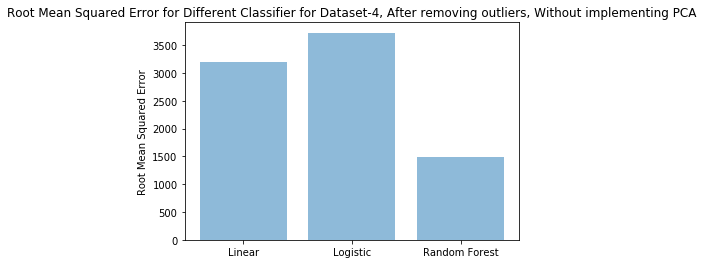

In [11]:
rmse_list=[]
print("Dataset - 4")
print("---------------------------------------")
print(" ")

#Dataset 4 Splitting
train, test = train_test_split(df_pre_3, test_size=0.20, random_state=42)
X_train = train.drop(['shares'], axis=1)  
y_train = train['shares']
X_test = test.drop(['shares'], axis=1)  
y_test = test['shares']

#Applying Linar Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("Root Mean squared error for Linear Regression")
print(lin_rmse)
rmse_list.append(lin_rmse)
print("---------------------------------------")
print(" ")

#Applying Logistic Regression
logistic_reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_train)
log_mse = mean_squared_error(y_train, y_pred)
log_rmse = np.sqrt(log_mse)
print("Root Mean squared error for Logistic Regression")
print(log_rmse)
rmse_list.append(log_rmse)
print("---------------------------------------")
print(" ")

#Applying Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42, n_jobs = 8)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_train)
rf_mse = mean_squared_error(y_train, y_pred)
rf_rmse = np.sqrt(rf_mse)
print("Root Mean squared error for Random Forest")
print(rf_rmse)
rmse_list.append(rf_rmse)
print("---------------------------------------")
print(rmse_list)
print(" ")

model_list = ['Linear', 'Logistic', 'Random Forest']
y_pos = np.arange(0, 3)
x_rate = rmse_list[0:3]  
plt.bar(y_pos, x_rate, align='center', alpha=0.5)
plt.xticks(y_pos, model_list)
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error for Different Classifier for Dataset-4, After removing outliers, Without implementing PCA') 
plt.show() 
